In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetic_data.csv')

In [3]:
print(df.shape)

(101766, 50)


In [4]:
df.drop('encounter_id', axis=1, inplace=True)

In [5]:
print("Dataset after dropping 'encounter_id':")
print (df.head)

Dataset after dropping 'encounter_id':
<bound method NDFrame.head of         patient_nbr             race  gender      age weight  \
0           8222157        Caucasian  Female   [0-10)      ?   
1          55629189        Caucasian  Female  [10-20)      ?   
2          86047875  AfricanAmerican  Female  [20-30)      ?   
3          82442376        Caucasian    Male  [30-40)      ?   
4          42519267        Caucasian    Male  [40-50)      ?   
...             ...              ...     ...      ...    ...   
101761    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     41088789        Caucasian    Male  [70-80)      ?   
101764     31693671        Caucasian  Female  [80-90)      ?   
101765    175429310        Caucasian    Male  [70-80)      ?   

        admission_type_id  discharge_disposition_id  admission_source_id  \
0                       6                        25                    1   
1         

In [6]:
df.replace('?', np.nan, inplace=True)
print("Dataset after replacing '?' with NaN:")
print(df.head())

Dataset after replacing '?' with NaN:
   patient_nbr             race  gender      age weight  admission_type_id  \
0      8222157        Caucasian  Female   [0-10)    NaN                  6   
1     55629189        Caucasian  Female  [10-20)    NaN                  1   
2     86047875  AfricanAmerican  Female  [20-30)    NaN                  1   
3     82442376        Caucasian    Male  [30-40)    NaN                  1   
4     42519267        Caucasian    Male  [40-50)    NaN                  1   

   discharge_disposition_id  admission_source_id  time_in_hospital payer_code  \
0                        25                    1                 1        NaN   
1                         1                    7                 3        NaN   
2                         1                    7                 2        NaN   
3                         1                    7                 2        NaN   
4                         1                    7                 1        NaN   

   ...

In [7]:
df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)
print("Unique classes in 'readmitted':", df['readmitted'].unique())




Unique classes in 'readmitted': [0 1]


In [8]:
print("Data types:")
print(df.dtypes)

Data types:
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohex

In [9]:
missing_percentages = df.isnull().sum() / len(df) * 100

In [10]:
columns_to_drop = missing_percentages[missing_percentages > 90].index.tolist()

In [11]:
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [12]:
columns_to_drop = ['examide', 'citoglipton', 'repaglinide', 'nateglinide', 'chlorpropamide',
                   'glimepiride', 'acetohexamide', 'tolbutamide', 'acarbose', 'miglitol',
                   'troglitazone', 'tolazamide', 'glyburide-metformin', 'glipizide-metformin',
                   'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']
df = df.drop(columns=columns_to_drop)


In [13]:

near_zero_variance_columns = ['repaglinide', 'nateglinide']  


columns_to_drop = [col for col in near_zero_variance_columns if col in df.columns]

if columns_to_drop:
    df.drop(columns_to_drop, axis=1, inplace=True)
    print("Data sample after dropping near-zero variance columns:")
    display(df.head())
else:
    print("No near-zero variance columns found or already removed.")


No near-zero variance columns found or already removed.


In [14]:
df.dropna(inplace=True)
print("Data shape after dropping rows with null values:", df.shape)
df = df.dropna(subset=['readmitted'])
df = df.dropna(how='all')
display(df.head())

Data shape after dropping rows with null values: (4166, 30)


,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,A1Cresult,metformin,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
23879,7239654,Caucasian,Female,[70-80),1,3,6,12,UN,InternalMedicine,...,>8,No,No,No,No,No,Steady,No,Yes,0
24069,14244093,Caucasian,Female,[30-40),1,1,6,13,MC,Nephrology,...,>8,No,No,No,No,No,Steady,No,Yes,0
24117,537543,Caucasian,Female,[30-40),2,1,4,11,MC,Nephrology,...,>8,No,No,No,Steady,No,Steady,Ch,Yes,0
24177,354474,Caucasian,Male,[70-80),2,3,1,12,MC,InternalMedicine,...,>7,No,Down,No,No,No,No,Ch,Yes,0
24228,1186533,AfricanAmerican,Female,[30-40),1,1,6,6,HM,InternalMedicine,...,Norm,No,No,No,No,No,No,No,No,0


In [15]:
df_cleaned = df.copy()
print(df_cleaned['readmitted'].value_counts())

readmitted
0    3770
1     396
Name: count, dtype: int64


In [16]:
print("Cleaned Shape:", df.shape)

Cleaned Shape: (4166, 30)


In [17]:
numeric_df = df.select_dtypes(include=[np.number])

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1



In [18]:
outliers = (numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))


In [19]:
outlier_rows = outliers.any(axis=1)

In [20]:
df_no_outliers = df[~outlier_rows]

In [21]:
print(f"Shape after outlier removal: {df_no_outliers.shape}")

Shape after outlier removal: (2127, 30)


In [22]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


df_no_outliers.loc[:, numeric_df.columns] = scaler.fit_transform(df_no_outliers[numeric_df.columns])

print("Data after normalization:")
print(df_no_outliers.describe())


Data after normalization:
        patient_nbr  admission_type_id  discharge_disposition_id  \
count  2.127000e+03       2.127000e+03              2.127000e+03   
mean  -5.344938e-17       5.344938e-17              5.344938e-17   
std    1.000235e+00       1.000235e+00              1.000235e+00   
min   -1.333606e+00      -1.064435e+00             -4.976417e-01   
25%   -8.804193e-01      -1.064435e+00             -4.976417e-01   
50%   -2.844817e-01       3.110530e-01             -4.976417e-01   
75%    9.349092e-01       3.110530e-01             -4.976417e-01   
max    3.219841e+00       1.686541e+00              2.856236e+00   

       admission_source_id  time_in_hospital  num_lab_procedures  \
count         2.127000e+03      2.127000e+03        2.127000e+03   
mean         -1.336235e-17      2.338411e-17       -6.013056e-17   
std           1.000235e+00      1.000235e+00        1.000235e+00   
min          -1.553855e+00     -1.279649e+00       -2.806851e+00   
25%          -1.55385

In [23]:
# Display the top 5 rows
print(df_no_outliers.head())

# Display the bottom 5 rows
print(df_no_outliers.tail())

# Display a random sample of 5 rows
print(df_no_outliers.sample(7))


       patient_nbr             race  gender      age  admission_type_id  \
23879    -1.158865        Caucasian  Female  [70-80)          -1.064435   
24069    -0.989785        Caucasian  Female  [30-40)          -1.064435   
24117    -1.320648        Caucasian  Female  [30-40)           0.311053   
24177    -1.325067        Caucasian    Male  [70-80)           0.311053   
24228    -1.304982  AfricanAmerican  Female  [30-40)          -1.064435   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
23879                  0.843910             0.344726          2.634582   
24069                 -0.497642             0.344726          2.990421   
24117                 -0.497642            -0.414707          2.278743   
24177                  0.843910            -1.553855          2.634582   
24228                 -0.497642             0.344726          0.499547   

      payer_code medical_specialty  ...  A1Cresult  metformin  glipizide  \
23879         UN  InternalMe

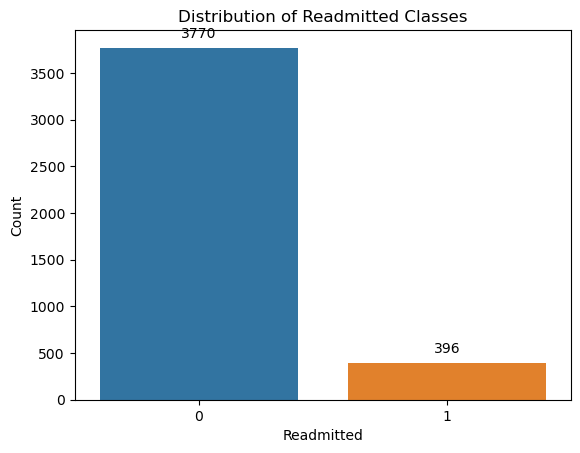

In [24]:

sns.countplot(x='readmitted', data=df_cleaned)
plt.title('Distribution of Readmitted Classes')
plt.xlabel('Readmitted')
plt.ylabel('Count')


ax = plt.gca()  
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


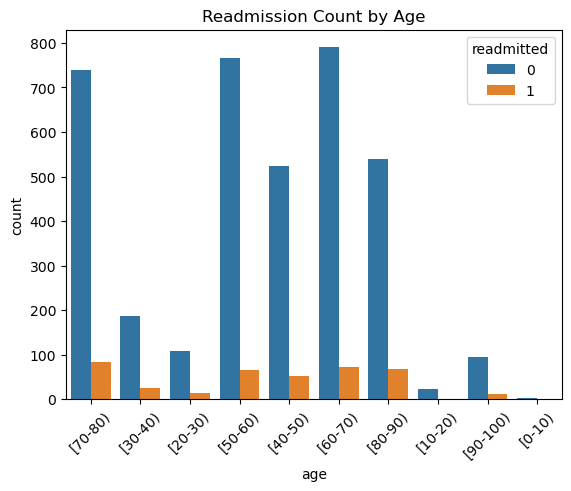

In [25]:
# Plot showing the count of readmitted cases for each age group
sns.countplot(x='age', hue='readmitted', data=df_cleaned)
plt.title('Readmission Count by Age')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


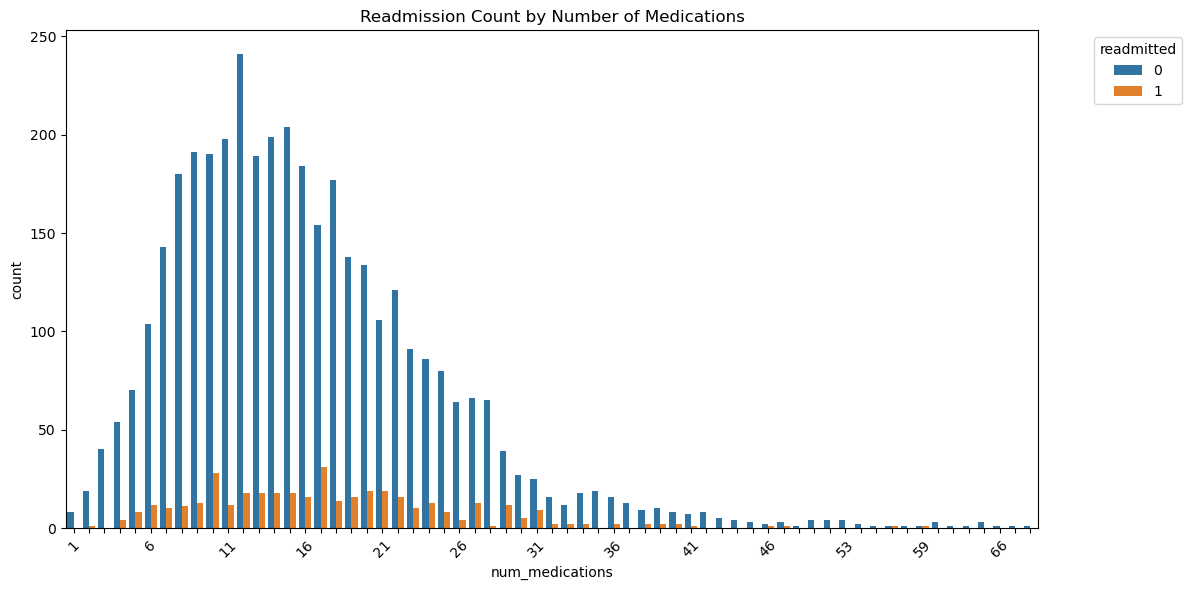

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))  # Increase the figure size

# Create the countplot
ax = sns.countplot(x='num_medications', hue='readmitted', data=df_cleaned)

# Improve readability
plt.title('Readmission Count by Number of Medications')
plt.xticks(rotation=45)  # Adjust rotation to balance readability and space

# Move the legend out of the plot
plt.legend(title='readmitted', bbox_to_anchor=(1.05, 1), loc='upper left')


n = 5  # Adjust n to control the density of the x-tick labels
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % n != 0:
        label.set_visible(False)

# Show the plot
plt.tight_layout()  # Fit the plot within the figure neatly
plt.show()


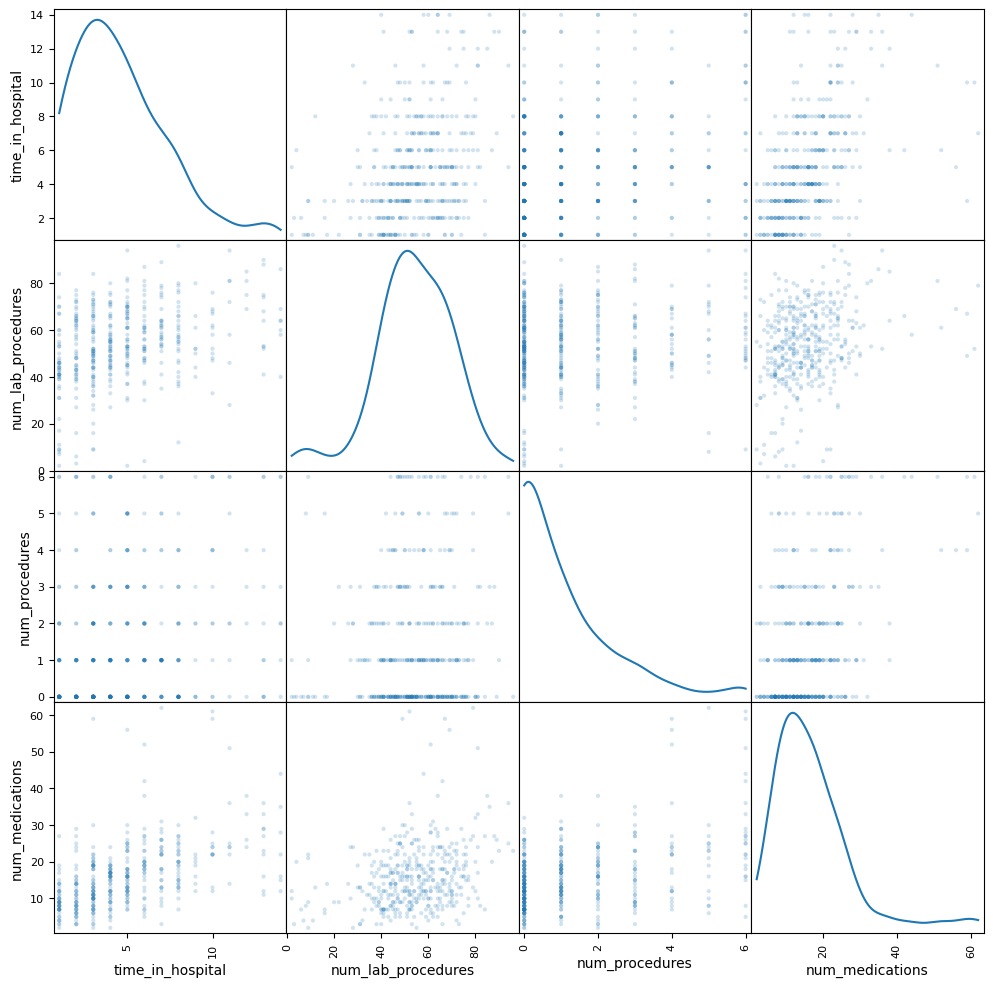

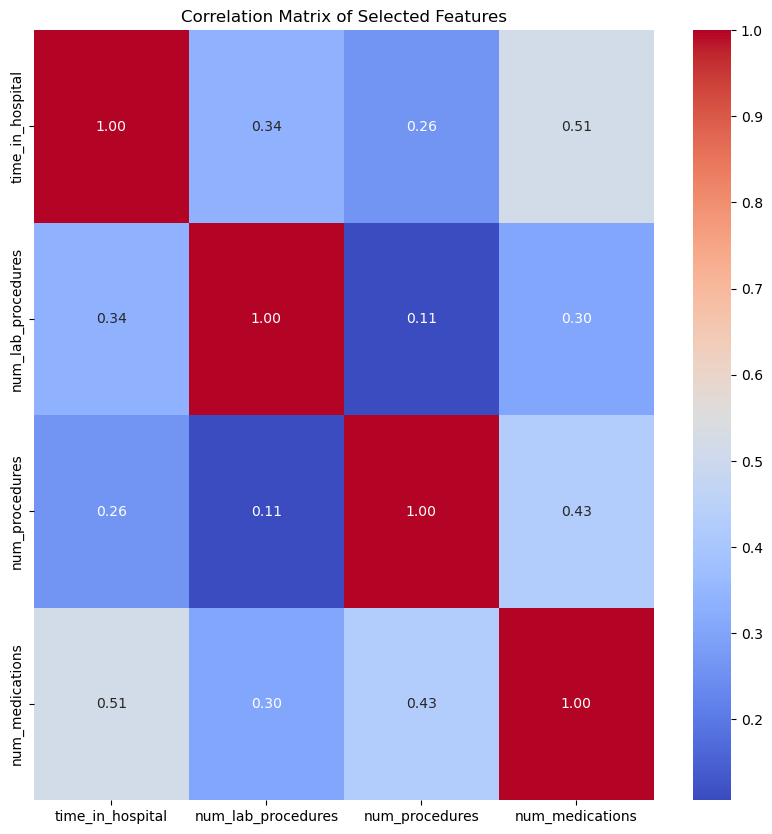

time_in_hospital  num_medications     0.51489
num_medications   time_in_hospital    0.51489
dtype: float64


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


numerical_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications']
subset_df = df_cleaned[numerical_features]

# Scatter matrix plot using a random sample of the DataFrame to reduce computation time
scatter_matrix(subset_df.sample(frac=0.1, random_state=1), alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.show()

# Correlation matrix
corr_matrix = subset_df.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix of Selected Features')
plt.show()

# To identify pairs of highly correlated features, we can look for values close to 1 or -1
highly_correlated_pairs = corr_matrix.unstack().sort_values(kind="quicksort", ascending=False)
highly_correlated_pairs = highly_correlated_pairs[highly_correlated_pairs != 1]  # Remove self-correlation
print(highly_correlated_pairs[abs(highly_correlated_pairs) > 0.5])  # Adjust threshold as necessary


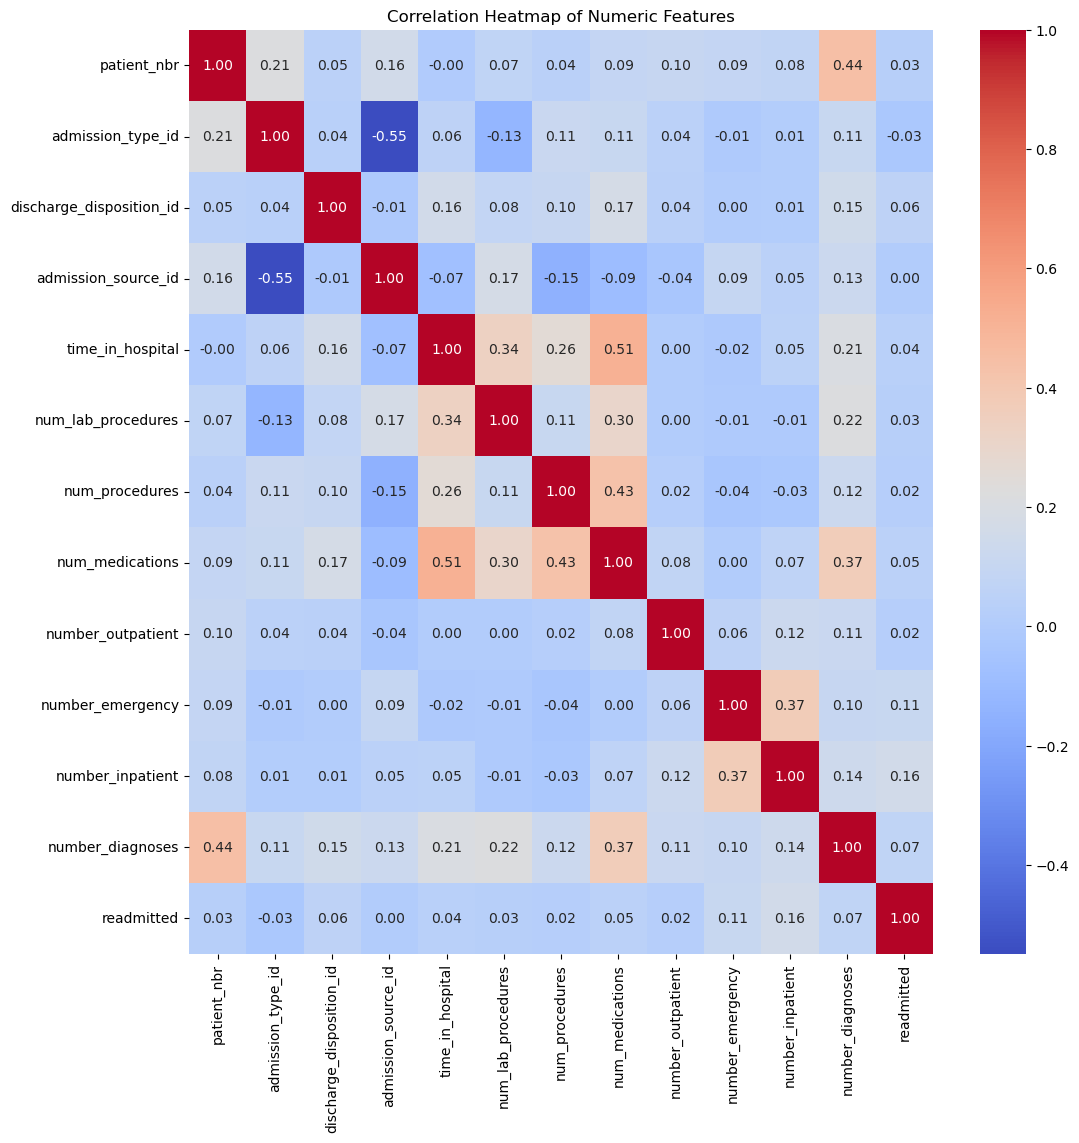

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming that you need to one-hot encode the categorical variables in df_cleaned
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)


numeric_features = df_encoded.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = df_encoded[numeric_features].corr()

plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [29]:
pip install -U imblearn


Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


print("DataFrame shape before splitting:", df.shape)

DataFrame shape before splitting: (4166, 30)


In [31]:
if df.shape[0] > 0:
   
    predictor_columns = [
        'time_in_hospital', 'num_lab_procedures', 'num_medications',
        'number_diagnoses', 'number_inpatient', 'number_emergency', 
        'number_outpatient'
    ]
    predictor_columns += [col for col in df.columns if col.startswith('age_') or col.startswith('gender_')]
    
    X = df[predictor_columns]
    y = df['readmitted']

    # Splitting the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Building the logistic regression model
    logreg_model = LogisticRegression(max_iter=1000)
    logreg_model.fit(X_train, y_train)

    # Cross-validation
    cv_scores = cross_val_score(logreg_model, X, y, cv=5)

    # Output the results
    print("Cross-Validation Accuracy Scores:", cv_scores)
    print("Average CV Score:", cv_scores.mean())

    # Evaluating the model on the test set
    y_pred = logreg_model.predict(X_test)
    print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
else:
    print("DataFrame is empty. Check data loading and cleaning steps.")

Cross-Validation Accuracy Scores: [0.9028777  0.90756303 0.90156062 0.90876351 0.90636255]
Average CV Score: 0.9054254795443357
Test Set Accuracy: 0.9144

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      1143
           1       0.50      0.02      0.04       107

    accuracy                           0.91      1250
   macro avg       0.71      0.51      0.50      1250
weighted avg       0.88      0.91      0.88      1250



In [32]:
!pip install -U imbalanced-learn


In [33]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler



# 1. Evaluate model with additional metrics
y_pred_proba = logreg_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc}")

# 2. Balance the data using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Apply scaling after resampling
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# Retrain the model on the balanced data
logreg_model_resampled = LogisticRegression(max_iter=1000)
logreg_model_resampled.fit(X_resampled_scaled, y_resampled)

# Evaluate the retrained model
y_pred_resampled = logreg_model_resampled.predict(X_test_scaled)
y_pred_proba_resampled = logreg_model_resampled.predict_proba(X_test_scaled)[:, 1]
roc_auc_resampled = roc_auc_score(y_test, y_pred_proba_resampled)

print("After resampling with RandomOverSampler:")
print("Classification Report:\n", classification_report(y_test, y_pred_resampled))
print(f"ROC AUC Score: {roc_auc_resampled}")


ROC AUC Score: 0.5941079794932175
After resampling with RandomOverSampler:
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.71      0.80      1143
           1       0.12      0.41      0.18       107

    accuracy                           0.68      1250
   macro avg       0.52      0.56      0.49      1250
weighted avg       0.86      0.68      0.75      1250

ROC AUC Score: 0.5948520453634885


In [34]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_resampled))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_resampled))

print(f"\nROC AUC Score (Resampled): {roc_auc_resampled}")


Confusion Matrix:
[[811 332]
 [ 63  44]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.71      0.80      1143
           1       0.12      0.41      0.18       107

    accuracy                           0.68      1250
   macro avg       0.52      0.56      0.49      1250
weighted avg       0.86      0.68      0.75      1250


ROC AUC Score (Resampled): 0.5948520453634885


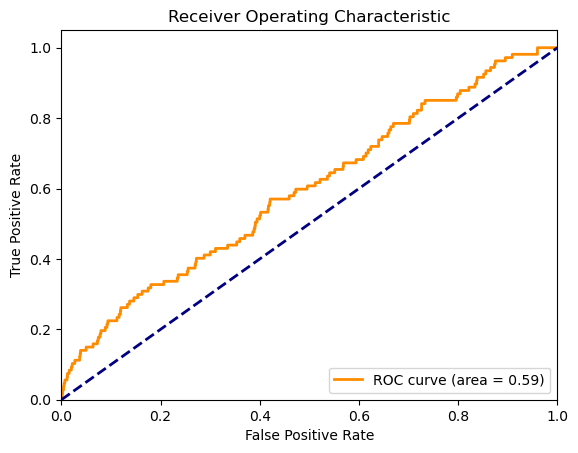

In [35]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_resampled)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


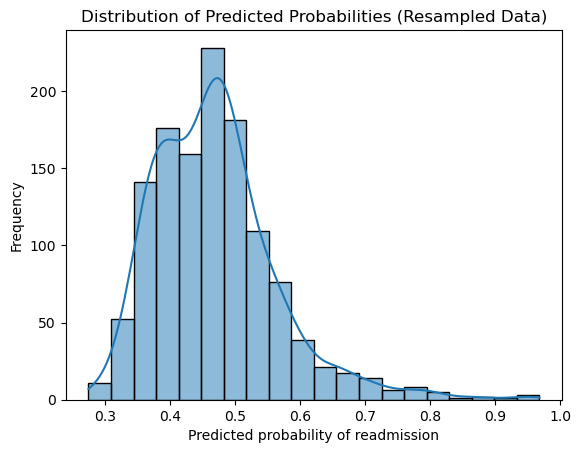

In [36]:
sns.histplot(y_pred_proba_resampled, bins=20, kde=True)
plt.title('Distribution of Predicted Probabilities (Resampled Data)')
plt.xlabel('Predicted probability of readmission')
plt.ylabel('Frequency')
plt.show()


In [37]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline


df = pd.read_csv('diabetic_data.csv')


df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

df = df.drop(['encounter_id', 'patient_nbr'], axis=1)

# Identifying numerical and categorical columns
X = df.drop('readmitted', axis=1)
y = df['readmitted']
numerical_columns = X.select_dtypes(exclude=['object']).columns.tolist()
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

# Creating a preprocessing pipeline for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
    ])

# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(X)

# Clustering on preprocessed data
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_preprocessed)
df['cluster'] = clusters

# Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(df.drop('readmitted', axis=1), y, test_size=0.2, random_state=42)

# Training and evaluating a model for each cluster
for cluster in X_train['cluster'].unique():
    cluster_indices = X_train[X_train['cluster'] == cluster].index
    X_train_cluster = preprocessor.transform(X_train.loc[cluster_indices].drop('cluster', axis=1))
    y_train_cluster = y_train.loc[cluster_indices]

    if len(y_train_cluster) > 0:
        # Model pipeline for training
        model_pipeline = Pipeline(steps=[
            ('scaler', StandardScaler(with_mean=False)),
            ('classifier', LogisticRegression(max_iter=1000, random_state=42))
        ])

        model_pipeline.fit(X_train_cluster, y_train_cluster)

        # Testing the model on the corresponding test cluster
        X_test_cluster_indices = X_test[X_test['cluster'] == cluster].index
        X_test_cluster = preprocessor.transform(X_test.loc[X_test_cluster_indices].drop('cluster', axis=1))
        y_test_cluster = y_test.loc[X_test_cluster_indices]

        if len(y_test_cluster) > 0:
            y_pred = model_pipeline.predict(X_test_cluster)
            print(f"Performance for cluster {cluster}:")
            print(classification_report(y_test_cluster, y_pred))
        else:
            print(f"No test samples available for cluster {cluster}.")
    else:
        print(f"No training samples available for cluster {cluster}.")


Performance for cluster 2:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      8715
           1       0.23      0.02      0.04      1115

    accuracy                           0.88      9830
   macro avg       0.56      0.51      0.49      9830
weighted avg       0.81      0.88      0.83      9830

Performance for cluster 1:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      3568
           1       0.25      0.05      0.08       382

    accuracy                           0.89      3950
   macro avg       0.58      0.52      0.51      3950
weighted avg       0.84      0.89      0.86      3950

Performance for cluster 0:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      5786
           1       0.21      0.02      0.04       788

    accuracy                           0.87      6574
   macro avg       0.54      0.50      0.48    

In [38]:
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


scaler = StandardScaler(with_mean=False)


for cluster in X_train['cluster'].unique():
    cluster_indices = X_train[X_train['cluster'] == cluster].index
    X_train_cluster = preprocessor.transform(X_train.loc[cluster_indices].drop('cluster', axis=1))
    X_train_cluster_scaled = scaler.fit_transform(X_train_cluster)
    y_train_cluster = y_train.loc[cluster_indices]

    if len(np.unique(y_train_cluster)) > 1:  
       
        smote = SMOTE(random_state=42)
        X_train_balanced, y_train_balanced = smote.fit_resample(X_train_cluster_scaled, y_train_cluster)

        
        model_pipeline = Pipeline([
            ('classifier', LogisticRegression(max_iter=5000, random_state=42))
        ])

        
        scores = cross_val_score(model_pipeline, X_train_balanced, y_train_balanced, cv=5, scoring='f1')
        print(f"Average F1 score for cluster {cluster}: {scores.mean()}")

        model_pipeline.fit(X_train_balanced, y_train_balanced)

        # Testing the model on the corresponding test cluster
        X_test_cluster_indices = X_test[X_test['cluster'] == cluster].index
        X_test_cluster = preprocessor.transform(X_test.loc[X_test_cluster_indices].drop('cluster', axis=1))
        X_test_cluster_scaled = scaler.transform(X_test_cluster)
        y_test_cluster = y_test.loc[X_test_cluster_indices]

        if len(y_test_cluster) > 0:
            y_pred = model_pipeline.predict(X_test_cluster_scaled)
            print(f"Performance for cluster {cluster}:")
            print(classification_report(y_test_cluster, y_pred))
        else:
            print(f"No test samples available for cluster {cluster}.")
    else:
        print(f"No sufficient class representation for training in cluster {cluster}.")


Average F1 score for cluster 2: 0.6890963996542208
Performance for cluster 2:
              precision    recall  f1-score   support

           0       0.91      0.65      0.76      8715
           1       0.16      0.52      0.24      1115

    accuracy                           0.64      9830
   macro avg       0.54      0.59      0.50      9830
weighted avg       0.83      0.64      0.70      9830

Average F1 score for cluster 1: 0.7532566995056252
Performance for cluster 1:
              precision    recall  f1-score   support

           0       0.93      0.68      0.79      3568
           1       0.15      0.51      0.23       382

    accuracy                           0.67      3950
   macro avg       0.54      0.60      0.51      3950
weighted avg       0.85      0.67      0.73      3950

Average F1 score for cluster 0: 0.7003769462728406
Performance for cluster 0:
              precision    recall  f1-score   support

           0       0.91      0.64      0.75      5786
   

In [39]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('diabetic_data.csv')

# Convert 'readmitted' to binary (1: <30 days, 0: otherwise)
df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

# Dropping irrelevant or identifier columns (assuming 'encounter_id', 'patient_nbr' are identifiers)
df = df.drop(['encounter_id', 'patient_nbr'], axis=1)

# Identifying numerical and categorical columns
X = df.drop('readmitted', axis=1)
y = df['readmitted']
numerical_columns = X.select_dtypes(exclude=['object']).columns.tolist()
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

# Creating a preprocessing pipeline for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
    ])

# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(X)

# Clustering on preprocessed data
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_preprocessed)
df['cluster'] = clusters

# Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(df.drop('readmitted', axis=1), y, test_size=0.2, random_state=42)

# Training and evaluating a model for each cluster
for cluster in X_train['cluster'].unique():
    cluster_indices = X_train[X_train['cluster'] == cluster].index
    X_train_cluster = preprocessor.transform(X_train.loc[cluster_indices].drop('cluster', axis=1))
    y_train_cluster = y_train.loc[cluster_indices]

    if len(y_train_cluster) > 0:
        # Model pipeline for training
        model_pipeline = Pipeline(steps=[
            ('scaler', StandardScaler(with_mean=False)),
            ('classifier', LogisticRegression(max_iter=1000, random_state=42))
        ])

        model_pipeline.fit(X_train_cluster, y_train_cluster)

        # Testing the model on the corresponding test cluster
        X_test_cluster_indices = X_test[X_test['cluster'] == cluster].index
        X_test_cluster = preprocessor.transform(X_test.loc[X_test_cluster_indices].drop('cluster', axis=1))
        y_test_cluster = y_test.loc[X_test_cluster_indices]

        if len(y_test_cluster) > 0:
            y_pred = model_pipeline.predict(X_test_cluster)
            print(f"Performance for cluster {cluster}:")
            print(classification_report(y_test_cluster, y_pred))
        else:
            print(f"No test samples available for cluster {cluster}.")
    else:
        print(f"No training samples available for cluster {cluster}.")


Performance for cluster 2:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      8715
           1       0.23      0.02      0.04      1115

    accuracy                           0.88      9830
   macro avg       0.56      0.51      0.49      9830
weighted avg       0.81      0.88      0.83      9830

Performance for cluster 1:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      3568
           1       0.25      0.05      0.08       382

    accuracy                           0.89      3950
   macro avg       0.58      0.52      0.51      3950
weighted avg       0.84      0.89      0.86      3950

Performance for cluster 0:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      5786
           1       0.21      0.02      0.04       788

    accuracy                           0.87      6574
   macro avg       0.54      0.50      0.48    

In [40]:
import numpy as np 
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Ensuring data scaling is performed before applying SMOTE
scaler = StandardScaler(with_mean=False)

# Training and evaluating a model for each cluster with SMOTE and cross-validation
for cluster in X_train['cluster'].unique():
    cluster_indices = X_train[X_train['cluster'] == cluster].index
    X_train_cluster = preprocessor.transform(X_train.loc[cluster_indices].drop('cluster', axis=1))
    X_train_cluster_scaled = scaler.fit_transform(X_train_cluster)
    y_train_cluster = y_train.loc[cluster_indices]

    if len(np.unique(y_train_cluster)) > 1:  # Ensure we have both classes present
        # Apply SMOTE for balancing
        smote = SMOTE(random_state=42)
        X_train_balanced, y_train_balanced = smote.fit_resample(X_train_cluster_scaled, y_train_cluster)

        # Model pipeline for training with increased max_iter
        model_pipeline = Pipeline([
            ('classifier', LogisticRegression(max_iter=5000, random_state=42))
        ])

        # Cross-validation within each cluster
        scores = cross_val_score(model_pipeline, X_train_balanced, y_train_balanced, cv=5, scoring='f1')
        print(f"Average F1 score for cluster {cluster}: {scores.mean()}")

        model_pipeline.fit(X_train_balanced, y_train_balanced)

        # Testing the model on the corresponding test cluster
        X_test_cluster_indices = X_test[X_test['cluster'] == cluster].index
        X_test_cluster = preprocessor.transform(X_test.loc[X_test_cluster_indices].drop('cluster', axis=1))
        X_test_cluster_scaled = scaler.transform(X_test_cluster)
        y_test_cluster = y_test.loc[X_test_cluster_indices]

        if len(y_test_cluster) > 0:
            y_pred = model_pipeline.predict(X_test_cluster_scaled)
            print(f"Performance for cluster {cluster}:")
            print(classification_report(y_test_cluster, y_pred))
        else:
            print(f"No test samples available for cluster {cluster}.")
    else:
        print(f"No sufficient class representation for training in cluster {cluster}.")


Average F1 score for cluster 2: 0.6890963996542208
Performance for cluster 2:
              precision    recall  f1-score   support

           0       0.91      0.65      0.76      8715
           1       0.16      0.52      0.24      1115

    accuracy                           0.64      9830
   macro avg       0.54      0.59      0.50      9830
weighted avg       0.83      0.64      0.70      9830

Average F1 score for cluster 1: 0.7532566995056252
Performance for cluster 1:
              precision    recall  f1-score   support

           0       0.93      0.68      0.79      3568
           1       0.15      0.51      0.23       382

    accuracy                           0.67      3950
   macro avg       0.54      0.60      0.51      3950
weighted avg       0.85      0.67      0.73      3950

Average F1 score for cluster 0: 0.7003769462728406
Performance for cluster 0:
              precision    recall  f1-score   support

           0       0.91      0.64      0.75      5786
   

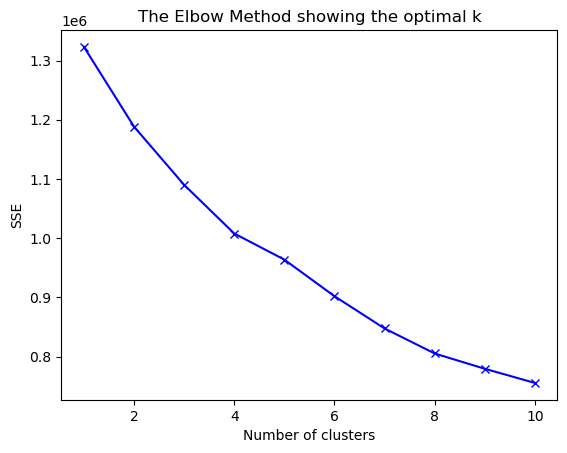

In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Example: Load your dataset (replace 'your_data.csv' with your actual data file)
df = pd.read_csv('diabetic_data.csv')


df_no_outliers = df.copy()  


scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_no_outliers.select_dtypes(include=[np.number]))  

# Determine the optimal number of clusters using the elbow method
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,n_init=3, random_state=0).fit(data_scaled)
    sse[k] = kmeans.inertia_  # Sum of squared distances of samples to their closest cluster center

# Plot SSE to find the elbow
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

optimal_clusters = 3  

# Apply K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_clusters,n_init=3, random_state=0).fit(data_scaled)
df_no_outliers['cluster'] = kmeans.labels_


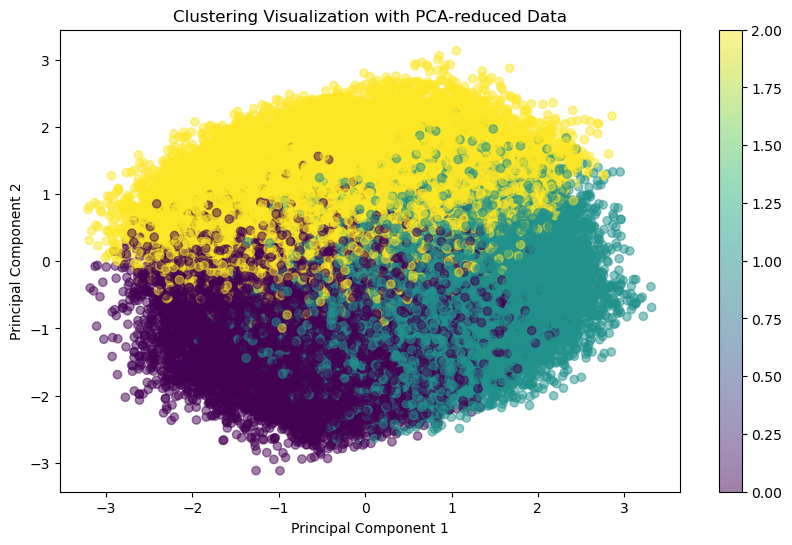

In [42]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


np.random.seed(0)
n_samples = 101766
n_features_numeric = 5
n_features_categorical = 2
n_clusters = 3


numeric_data = np.random.rand(n_samples, n_features_numeric)


categorical_data = np.random.randint(0, 2, (n_samples, n_features_categorical))

# Concatenate to form the dataset
data = np.concatenate([numeric_data, categorical_data], axis=1)

# Define the column names
columns = [f'num_{i}' for i in range(n_features_numeric)] + [f'cat_{i}' for i in range(n_features_categorical)]

# Create the dataframe
df = pd.DataFrame(data, columns=columns)

# Define the preprocessing for numeric and categorical features
numeric_features = [f'num_{i}' for i in range(n_features_numeric)]
categorical_features = [f'cat_{i}' for i in range(n_features_categorical)]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Apply preprocessing and KMeans clustering inside a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('cluster', KMeans(n_clusters=n_clusters,n_init=3, random_state=42))])

# Fit the pipeline
pipeline.fit(df)

# Get the cluster assignments
cluster_assignments = pipeline.named_steps['cluster'].labels_

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(pipeline.named_steps['preprocessor'].transform(df))

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_assignments, cmap='viridis', marker='o', alpha=0.5)
plt.colorbar()
plt.title('Clustering Visualization with PCA-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
